## HW Lec. 19 Global Optmization (III)

Please use basin hopping method to find all the ground states for LJ clusters for (N=10-20).

Try to

1, write down the priciples of basin hopping algorithm

2, choose three numbers bewteen 10 - 20

3, find the parameters which could lead to the global minimum.

4, plot the energy evolutions as a function of steps.

Extra

visulatization of energy landscape: http://pele-python.github.io/pele/#

### 1.) Principles of Basin Hopping Algorithm

It is a global optimization technique where you perform a series of iterations. Each iteration you get random coordinates and then either accept or reject them, depending on if you want minima or maxima.

### 2.) I will choose the three numbers N=10, N=15, N=13 
Using the basin hopping method I will find all the ground states.
I was using N=20 but the calculations are just taking too long.

In [1]:
from scipy.optimize import basinhopping
import numpy as np
import requests
from numba import jit

#Below are the functions we need to perform the Basin Hopping
#technique. These functions are from Lec 19 notes

@jit
def LJ(r):
    '''
    function for LJ calculation
    '''
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

@jit
def total_energy(positions):
    """
    function to calculate the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E

@jit
def init_pos(N, L=5):
    '''
    function to define a random inital position
    '''
    return L*np.random.random_sample((N*3,))

def get_pos_from_url(address='http://doye.chem.ox.ac.uk/jon/structures/LJ/points/',N=6):
    '''
    function to get data from ground state of LJ clusters
    '''
    url_address = address + str(N)
    data_str = requests.get(url_address).text
    return parse_url_text(data_str)    
    
def parse_url_text(data_str):
    x_array = []
    text = data_str.split('\n')
    for line in text:
        [x_array.append(float(i)) for i in line.split()]
    return np.array(x_array)

I had to put the basin hopping in a for loop to append the history
of energy states to be able to make a plot at the end. This resulted in repeating the iterations many times.

In [16]:
N_atom = 10

#Array to store energy history
energy_hist1 = []

#get random initial position
pos = init_pos(N_atom)

#perform basin hopping method
for i in range(N_atom):
    res = basinhopping(total_energy, pos, niter=10, 
                       T=3.0, stepsize=3.0, disp=True)
    new1 = res.fun
    energy_hist1.append(new1)

#print out true ground state value from web
ground_state = get_pos_from_url(N=10)
print('\n Ground state is:', total_energy(ground_state))

basinhopping step 0: f -26.4184
basinhopping step 1: f -26.4184 trial_f -26.4184 accepted 1  lowest_f -26.4184
basinhopping step 2: f -26.4184 trial_f -23.105 accepted 0  lowest_f -26.4184
basinhopping step 3: f -27.1901 trial_f -27.1901 accepted 1  lowest_f -27.1901
found new global minimum on step 3 with function value -27.1901
basinhopping step 4: f -27.1901 trial_f -26.4184 accepted 0  lowest_f -27.1901
basinhopping step 5: f -27.5452 trial_f -27.5452 accepted 1  lowest_f -27.5452
found new global minimum on step 5 with function value -27.5452
basinhopping step 6: f -27.4797 trial_f -27.4797 accepted 1  lowest_f -27.5452
basinhopping step 7: f -26.4429 trial_f -26.4429 accepted 1  lowest_f -27.5452
basinhopping step 8: f -26.6233 trial_f -26.6233 accepted 1  lowest_f -27.5452
basinhopping step 9: f -27.5452 trial_f -27.5452 accepted 1  lowest_f -27.5452
found new global minimum on step 9 with function value -27.5452
basinhopping step 10: f -27.5559 trial_f -27.5559 accepted 1  lowe

basinhopping step 0: f -26.4184
basinhopping step 1: f -19.8215 trial_f -19.8215 accepted 1  lowest_f -26.4184
basinhopping step 2: f -19.8215 trial_f -19.8215 accepted 1  lowest_f -26.4184
basinhopping step 3: f -19.8215 trial_f -19.8215 accepted 1  lowest_f -26.4184
basinhopping step 4: f -19.8215 trial_f -18.7782 accepted 0  lowest_f -26.4184
basinhopping step 5: f -19.8215 trial_f -19.8215 accepted 1  lowest_f -26.4184
basinhopping step 6: f -19.8215 trial_f -18.7782 accepted 0  lowest_f -26.4184
basinhopping step 7: f -19.8215 trial_f -19.1893 accepted 0  lowest_f -26.4184
basinhopping step 8: f -19.1893 trial_f -19.1893 accepted 1  lowest_f -26.4184
basinhopping step 9: f -19.8215 trial_f -19.8215 accepted 1  lowest_f -26.4184
basinhopping step 10: f -19.8215 trial_f -19.8215 accepted 1  lowest_f -26.4184
basinhopping step 0: f -26.4184
basinhopping step 1: f -27.4797 trial_f -27.4797 accepted 1  lowest_f -27.4797
found new global minimum on step 1 with function value -27.4797
ba

In [23]:
N_atom = 15

#Array to store energy history
energy_hist2 = []

#get random initial position
pos = init_pos(N_atom)

#perform basin hopping method
for i in range(N_atom):
    res = basinhopping(total_energy, pos, niter=10, 
                       T=3.5, stepsize=5.0, disp=True)
    new2 = res.fun
    energy_hist2.append(new2)

#print out true ground state value from web
ground_state = get_pos_from_url(N=15)
print('\n Ground state is:', total_energy(ground_state))

basinhopping step 0: f -43.3391
basinhopping step 1: f -44.3753 trial_f -44.3753 accepted 1  lowest_f -44.3753
found new global minimum on step 1 with function value -44.3753
basinhopping step 2: f -49.3166 trial_f -49.3166 accepted 1  lowest_f -49.3166
found new global minimum on step 2 with function value -49.3166
basinhopping step 3: f -49.333 trial_f -49.333 accepted 1  lowest_f -49.333
found new global minimum on step 3 with function value -49.333
basinhopping step 4: f -50.3123 trial_f -50.3123 accepted 1  lowest_f -50.3123
found new global minimum on step 4 with function value -50.3123
basinhopping step 5: f -52.3226 trial_f -52.3226 accepted 1  lowest_f -52.3226
found new global minimum on step 5 with function value -52.3226
basinhopping step 6: f -52.3226 trial_f -47.1058 accepted 0  lowest_f -52.3226
basinhopping step 7: f -49.2841 trial_f -49.2841 accepted 1  lowest_f -52.3226
basinhopping step 8: f -49.2841 trial_f -44.1696 accepted 0  lowest_f -52.3226
basinhopping step 9:

basinhopping step 7: f -49.2204 trial_f -44.1984 accepted 0  lowest_f -49.2204
basinhopping step 8: f -49.4782 trial_f -49.4782 accepted 1  lowest_f -49.4782
found new global minimum on step 8 with function value -49.4782
basinhopping step 9: f -49.4782 trial_f -48.3888 accepted 0  lowest_f -49.4782
basinhopping step 10: f -49.4782 trial_f -46.9951 accepted 0  lowest_f -49.4782
basinhopping step 0: f -43.3391
basinhopping step 1: f -46.4503 trial_f -46.4503 accepted 1  lowest_f -46.4503
found new global minimum on step 1 with function value -46.4503
basinhopping step 2: f -51.418 trial_f -51.418 accepted 1  lowest_f -51.418
found new global minimum on step 2 with function value -51.418
basinhopping step 3: f -48.3709 trial_f -48.3709 accepted 1  lowest_f -51.418
basinhopping step 4: f -51.3659 trial_f -51.3659 accepted 1  lowest_f -51.418
basinhopping step 5: f -48.3002 trial_f -48.3002 accepted 1  lowest_f -51.418
basinhopping step 6: f -51.3726 trial_f -51.3726 accepted 1  lowest_f -

basinhopping step 6: f -49.4086 trial_f -49.4086 accepted 1  lowest_f -49.4086
found new global minimum on step 6 with function value -49.4086
basinhopping step 7: f -49.4086 trial_f -45.5401 accepted 0  lowest_f -49.4086
basinhopping step 8: f -47.4826 trial_f -47.4826 accepted 1  lowest_f -49.4086
basinhopping step 9: f -47.2418 trial_f -47.2418 accepted 1  lowest_f -49.4086
basinhopping step 10: f -47.5145 trial_f -47.5145 accepted 1  lowest_f -49.4086
basinhopping step 0: f -43.3391
basinhopping step 1: f -44.3146 trial_f -44.3146 accepted 1  lowest_f -44.3146
found new global minimum on step 1 with function value -44.3146
basinhopping step 2: f -48.07 trial_f -48.07 accepted 1  lowest_f -48.07
found new global minimum on step 2 with function value -48.07
basinhopping step 3: f -48.07 trial_f -3.0606 accepted 0  lowest_f -48.07
basinhopping step 4: f -48.0391 trial_f -48.0391 accepted 1  lowest_f -48.07
basinhopping step 5: f -47.4035 trial_f -47.4035 accepted 1  lowest_f -48.07
ba

In [21]:
N_atom = 13

#Array to store energy history
energy_hist3 = []

#get random initial position
pos = init_pos(N_atom)

#perform basin hopping method
for i in range(N_atom):
    res = basinhopping(total_energy, pos, niter=10, 
                       T=3.0, stepsize=5.0, disp=True)
    new3 = res.fun
    energy_hist3.append(new3)

#print out true ground state value from web
ground_state = get_pos_from_url(N=13)
print('\n Ground state is:', total_energy(ground_state))

basinhopping step 0: f -37.4889
basinhopping step 1: f -37.9693 trial_f -37.9693 accepted 1  lowest_f -37.9693
found new global minimum on step 1 with function value -37.9693
basinhopping step 2: f -38.6694 trial_f -38.6694 accepted 1  lowest_f -38.6694
found new global minimum on step 2 with function value -38.6694
basinhopping step 3: f -40.6155 trial_f -40.6155 accepted 1  lowest_f -40.6155
found new global minimum on step 3 with function value -40.6155
basinhopping step 4: f -40.6155 trial_f -37.7563 accepted 0  lowest_f -40.6155
basinhopping step 5: f -41.3944 trial_f -41.3944 accepted 1  lowest_f -41.3944
found new global minimum on step 5 with function value -41.3944
basinhopping step 6: f -41.3944 trial_f -41.3944 accepted 1  lowest_f -41.3944
found new global minimum on step 6 with function value -41.3944
basinhopping step 7: f -40.5413 trial_f -40.5413 accepted 1  lowest_f -41.3944
basinhopping step 8: f -40.6155 trial_f -40.6155 accepted 1  lowest_f -41.3944
basinhopping ste

basinhopping step 10: f -39.2522 trial_f -36.4974 accepted 0  lowest_f -44.3268
basinhopping step 0: f -37.4889
basinhopping step 1: f -38.7601 trial_f -38.7601 accepted 1  lowest_f -38.7601
found new global minimum on step 1 with function value -38.7601
basinhopping step 2: f -38.7601 trial_f -37.3448 accepted 0  lowest_f -38.7601
basinhopping step 3: f -37.1068 trial_f -37.1068 accepted 1  lowest_f -38.7601
basinhopping step 4: f -38.7839 trial_f -38.7839 accepted 1  lowest_f -38.7839
found new global minimum on step 4 with function value -38.7839
basinhopping step 5: f -38.7839 trial_f -36.2844 accepted 0  lowest_f -38.7839
basinhopping step 6: f -39.6243 trial_f -39.6243 accepted 1  lowest_f -39.6243
found new global minimum on step 6 with function value -39.6243
basinhopping step 7: f -39.6243 trial_f -37.6318 accepted 0  lowest_f -39.6243
basinhopping step 8: f -40.4333 trial_f -40.4333 accepted 1  lowest_f -40.4333
found new global minimum on step 8 with function value -40.4333


basinhopping step 7: f -41.3944 trial_f -41.3944 accepted 1  lowest_f -41.3944
found new global minimum on step 7 with function value -41.3944
basinhopping step 8: f -41.3944 trial_f -39.7171 accepted 0  lowest_f -41.3944
basinhopping step 9: f -41.3944 trial_f -4.72692 accepted 0  lowest_f -41.3944
basinhopping step 10: f -44.3268 trial_f -44.3268 accepted 1  lowest_f -44.3268
found new global minimum on step 10 with function value -44.3268
basinhopping step 0: f -37.4889
basinhopping step 1: f -40.6046 trial_f -40.6046 accepted 1  lowest_f -40.6046
found new global minimum on step 1 with function value -40.6046
basinhopping step 2: f -40.6046 trial_f -37.6071 accepted 0  lowest_f -40.6046
basinhopping step 3: f -39.1438 trial_f -39.1438 accepted 1  lowest_f -40.6046
basinhopping step 4: f -40.6702 trial_f -40.6702 accepted 1  lowest_f -40.6702
found new global minimum on step 4 with function value -40.6702
basinhopping step 5: f -40.7585 trial_f -40.7585 accepted 1  lowest_f -40.7585

### 3.) Parameters that lead to minimum
for N=10, T=3.0 with step size 3.0

for N=15, T=3.5 with step size 5.0

for N=13, T=3.0 with step size 5.0

### 4.) Plot the energy evolutions as a function of steps

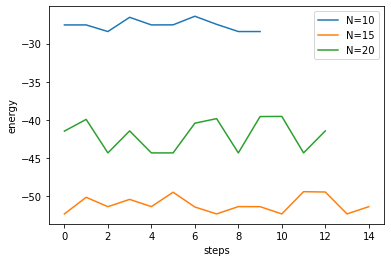

In [24]:
import matplotlib.pyplot as plt

plt.plot(energy_hist1, label='N=10')
plt.plot(energy_hist2, label='N=15')
plt.plot(energy_hist3, label='N=20')

plt.legend()
plt.xlabel('steps')
plt.ylabel('energy')
plt.show()

### Extra: Visualization of energy landscape

I've been trying and searching and cannot install pele for some reason. From what I've read, you have to use Python 2.x version because Pele isn't being updated anymore and my system is very new.